In [99]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from  sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')


In [100]:
df = pd.read_csv('customer_booking.csv',encoding='latin-1')

In [101]:
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [102]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [103]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [104]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<AxesSubplot: xlabel='flight_day', ylabel='booking_complete'>

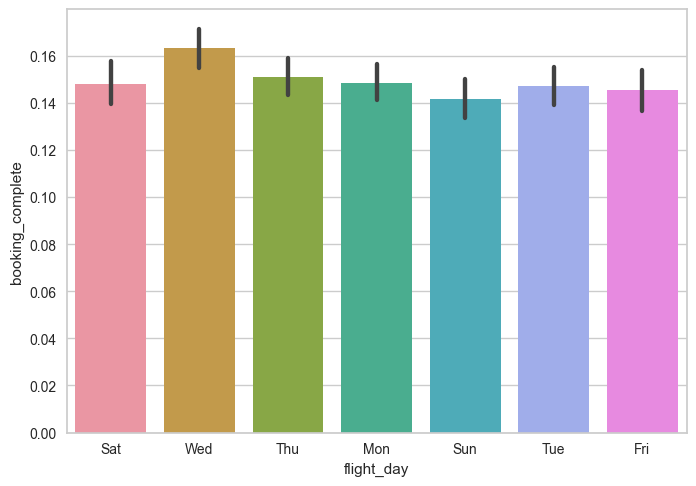

In [105]:
sns.barplot(x='flight_day' , y='booking_complete',data=df)

<AxesSubplot: xlabel='flight_hour', ylabel='booking_complete'>

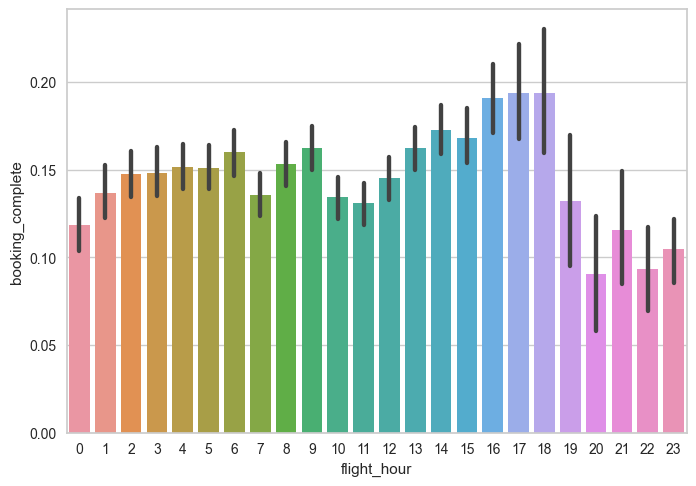

In [106]:
sns.barplot(x='flight_hour' , y='booking_complete',data=df)

In [107]:
# plt.pie(df['booking_complete'] , labels=df['booking_origin'],autopct="%1.1f%%")
# plt.show()

In [108]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [109]:
df = df.drop(['route','flight_day','booking_origin'] , axis =1)


In [110]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,0,1,5.62,0


In [111]:
label = df['booking_complete']

In [112]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [113]:
# from sklearn.preprocessing import OneHotEncoder
# # converting type of columns to category
# df['trip_type'] = df['trip_type'].astype('category')
# df['sales_channel'] = df['sales_channel'].astype('category')

# # Assigning numerical values and storing it in another columns
# df['trip_type_new'] = df['trip_type'].cat.codes
# df['sales_channel_new'] = df['sales_channel'].cat.codes

# # Create an instance of One-hot-encoder
# enc = OneHotEncoder()

# # Passing encoded columns

# enc_data = pd.DataFrame(enc.fit_transform(
#     df[['trip_type_new', 'sales_channel_new']]).toarray())

# # Merge with main
# New_df = df.join(enc_data)

# print(New_df)

In [114]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['sales_channel', 'trip_type']) 
df_new = pd.DataFrame(one_hot_encoded_data)


In [115]:
df_new = df_new.drop('booking_complete', axis=1)

In [116]:
df_new


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,1,0,0,5.52,1,0,0,0,1
1,1,112,20,3,0,0,0,5.52,1,0,0,0,1
2,2,243,22,17,1,1,0,5.52,1,0,0,0,1
3,1,96,31,4,0,0,1,5.52,1,0,0,0,1
4,2,68,22,15,1,0,1,5.52,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,1,0,0,0,1
49996,1,111,6,4,0,0,0,5.62,1,0,0,0,1
49997,1,24,6,22,0,0,1,5.62,1,0,0,0,1
49998,1,15,6,11,1,0,1,5.62,1,0,0,0,1


### normalizing the values

In [117]:
from sklearn.preprocessing import StandardScaler

# CREATE STANDARD SCALER OBJECT

scaler =  StandardScaler()

# fit and transform the data
scaled_df = scaler.fit_transform(df_new)

In [118]:
# creating the data frame for  scaled values
scaled_df = pd.DataFrame(scaled_df , columns=df_new.columns)

In [119]:
scaled_df['booking_complete']=label

In [120]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


### plotting the corelation matrics

<AxesSubplot: >

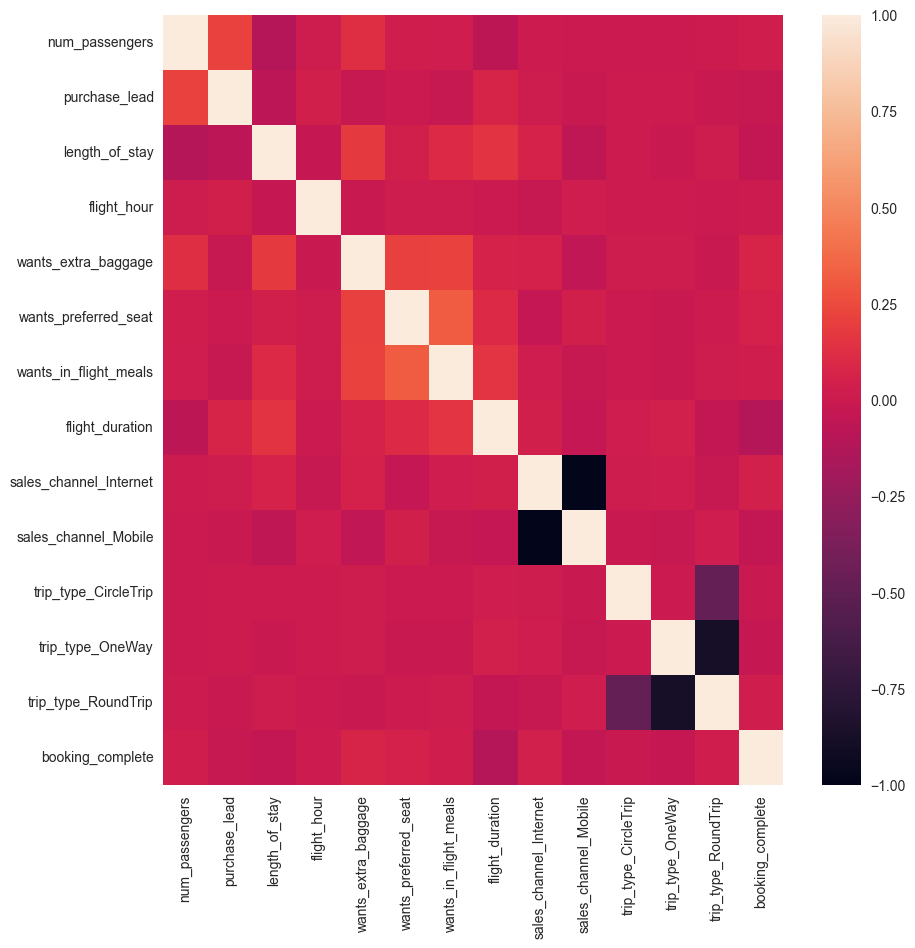

In [121]:
corr = scaled_df.corr()

plt.figure(figsize=(10,10))
# plot the heat map
sns.heatmap(corr)



## Splitting , Training and Testing

In [122]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

### preparing The model
 

In [123]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [124]:
#log_reg = LogisticRegression()
#svc_classifier = SVC()
# dt_classifier = DecisionTreeClassifier()
# knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [125]:
#log_reg.fit(X_train,y_train)
#svc_classifier.fit(X_train,y_train)
# dt_classifier.fit(X_train,y_train)
# knn_classifier.fit(X_train,y_train)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [126]:
#log_reg_ypred = log_reg.predict(X_test)
#svc_classifier_ypred = svc_classifier.predict(X_test)
# dt_classifier_ypred = dt_classifier.predict(X_test)
# knn_classifier_ypred = knn_classifier.predict(X_test)
rf_classifier_ypred = rf_classifier.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score

#log_reg_acc        = accuracy_score(y_test,log_reg_ypred)
# svc_classifier_acc = accuracy_score(y_test,svc_classifier_ypred)


# dt_classifier_acc  = accuracy_score(y_test,dt_classifier_ypred)
# knn_classifier_acc = accuracy_score(y_test,knn_classifier_ypred)
rf_classifier_acc  = accuracy_score(y_test,rf_classifier_ypred)
rf_classifier_prec  = precision_score(y_test,rf_classifier_ypred)
rf_classifier_f1  = f1_score(y_test,rf_classifier_ypred)

In [128]:
#print("Logistic regression : " , round(log_reg_acc*100,2))   # calculated till 2 decimal places
# print("support vector classifier : " , round(svc_classifier_acc*100,2))
# print("decision tree classifier : " , round(dt_classifier_acc*100,2))
# print("K-nearest neighbor : " , round(knn_classifier_acc*100,2))
print("Random Forest : " , round(rf_classifier_acc*100,2))
print("Random Forest : " , round(rf_classifier_prec*100,2))
print("Random Forest : " , round(rf_classifier_f1*100*2))

Random Forest :  84.33
Random Forest :  35.92
Random Forest :  25


0.99885

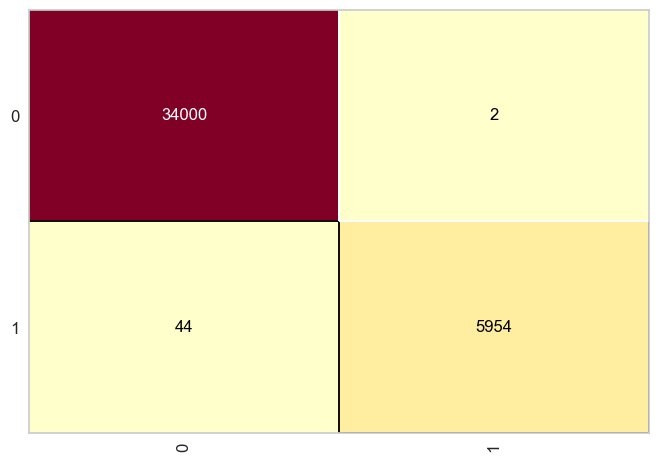

In [129]:
cm = ConfusionMatrix(rf_classifier, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

Text(0.5, 0, 'Random Forest Feature Importance')

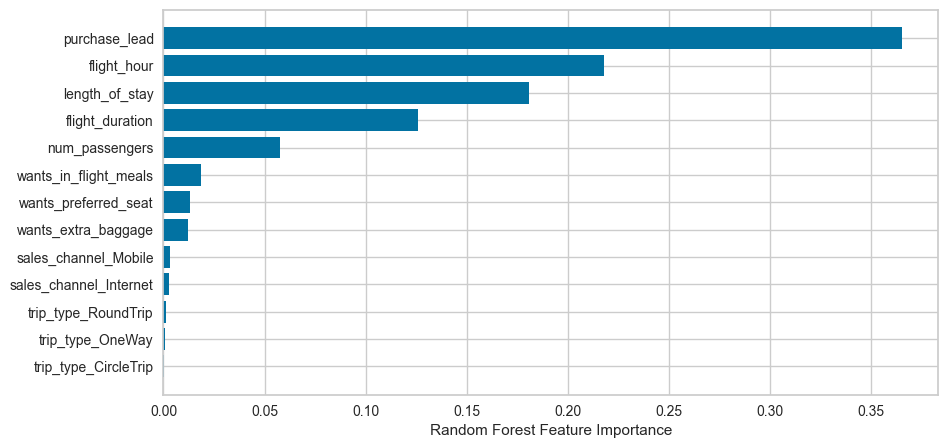

In [130]:
plt.figure(figsize=(10,5))
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### balancing the data set

In [158]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df['booking_complete'] == 0].sample(n=8000)

In [159]:
#concatenate the two dataframe, one having all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.booking_complete==1], scaled_df_0], ignore_index=True)

In [160]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [161]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,1.380928,-0.585298,-0.561996,-1.120780,0.703747,1.538654,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,0.400684,-0.828525,-0.502977,-0.381764,0.703747,1.538654,-0.863497,-1.474806,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
2,0.400684,2.410817,0.411819,2.389544,0.703747,1.538654,-0.863497,0.195370,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,-0.629521,-0.532487,-0.751272,-1.420965,-0.649919,1.158082,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,-0.579559,-0.408406,0.146233,-0.751272,-1.420965,1.538654,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,1.380928,0.122272,-0.502977,1.281021,0.703747,-0.649919,-0.863497,-1.742035,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15474,-0.579559,0.221774,-0.001315,0.542005,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15475,-0.579559,-0.176234,-0.532487,-1.305534,-1.420965,1.538654,-0.863497,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15476,-0.579559,1.935419,-0.532487,-1.675042,0.703747,-0.649919,1.158082,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1


In [162]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [163]:
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=10,random_state=42)

In [164]:

clf_rf.fit(X_train,y_train)
y_pred_test = clf_rf.predict(X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall , specificity and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall , specificity and f1-score for training data are 0.63, 0.61, 0.61, 0.65 and 0.61 respectively


0.6453089244851259

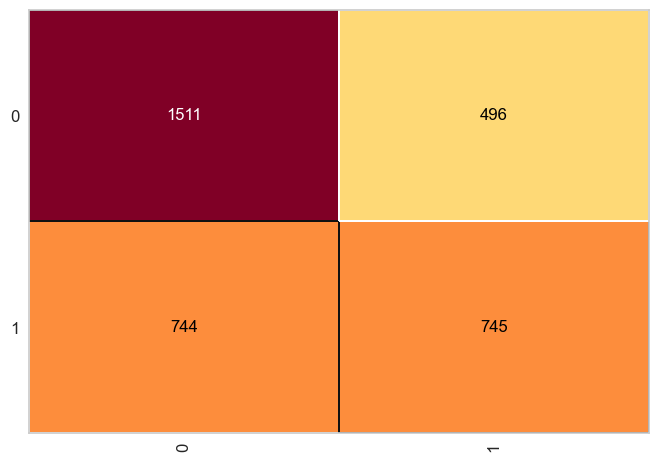

In [154]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

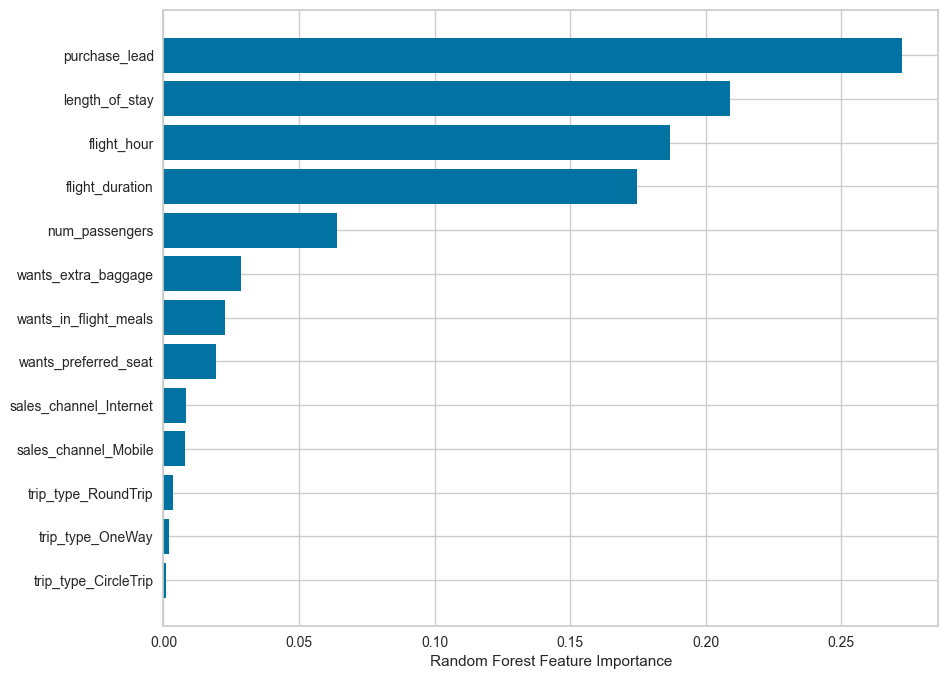

In [155]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")